### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [3]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='object')

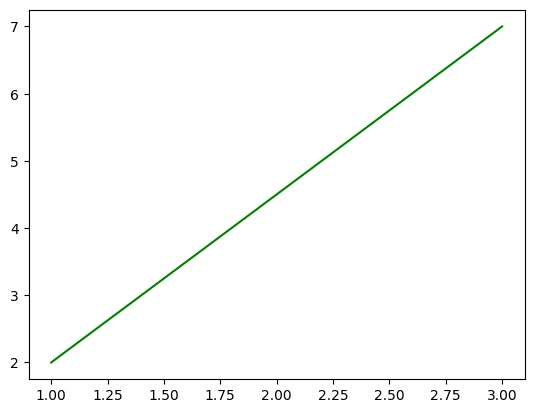

In [4]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

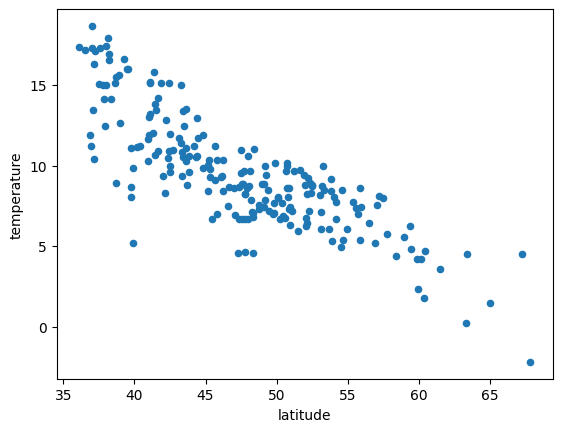

In [5]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

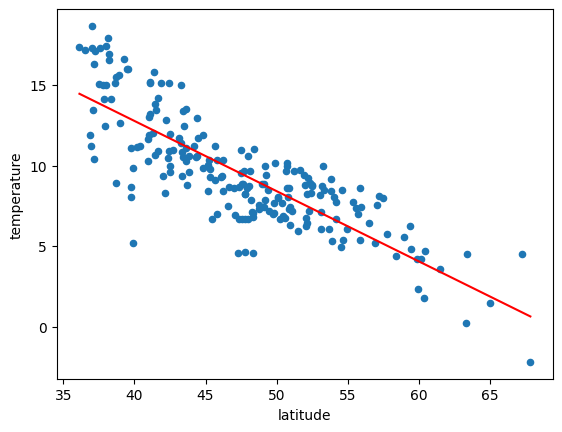

In [6]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [7]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267099
Correlation coefficient for temperature versus longitude: -0.16930750403617875


Training data:


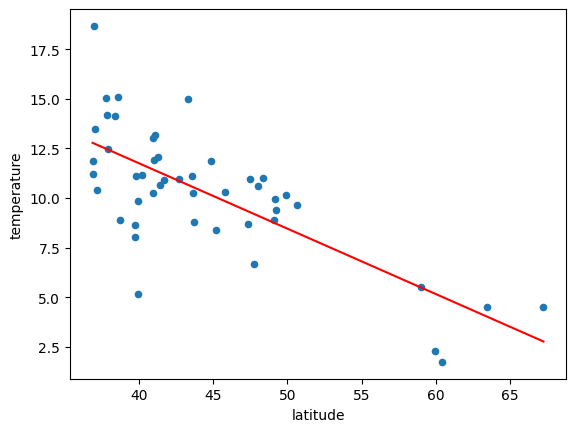

In [8]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Norway, France, and Turkey
train = cities[ (cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [9]:
train.head()

,city,country,latitude,longitude,temperature
3,Adana,Turkey,36.99,35.32,18.67
6,Amiens,France,49.90,2.30,10.17
10,Angers,France,47.48,-0.53,10.98
11,Ankara,Turkey,39.93,32.86,9.86
12,Antalya,Turkey,36.89,30.70,11.88


In [10]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        # Use float() to convert dataframe element to value
        print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', float(city.temperature))

Enter city name (or "quit" to quit): Amiens


/tmp/ipython-input-1798674423.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Predicted temperature:', a * float(city.latitude) + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
/tmp/ipython-input-1798674423.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual temperature:', float(city.temperature))


Predicted temperature: 8.495921130358
Actual temperature: 10.17
Enter city name (or "quit" to quit): quit


### <font color="green">**Your Turn: World Cup Data**</font>

In [11]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

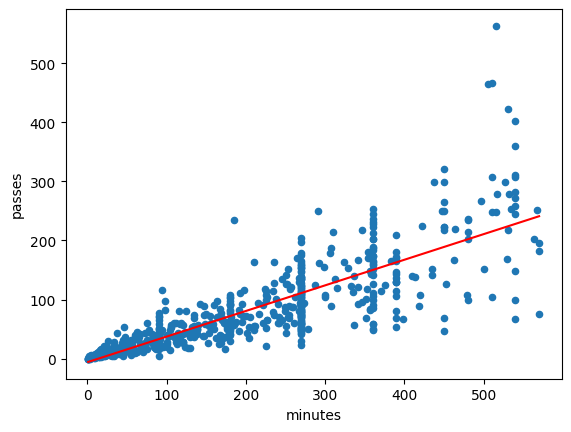

In [17]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
players.plot.scatter('minutes', 'passes')
m, c = np.polyfit(players.minutes, players.passes, 1)
x1, x2 = players.minutes.min(), players.minutes.max()
plt.plot([x1, x2], [m * x1 + c, m * x2 + c], color='red')
plt.xlabel('minutes')
plt.ylabel('passes')
plt.show()

In [18]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
pairs = [
    ('passes', 'minutes'),
    ('tackles', 'minutes'),
    ('shots', 'minutes'),
    ('saves', 'minutes'),
]
for y, x in pairs:
    r = np.corrcoef(players[x], players[y])[1, 0]
    print(f'Correlation {y} vs {x}: {r:.4f}')

Correlation passes vs minutes: 0.8151
Correlation tackles vs minutes: 0.6107
Correlation shots vs minutes: 0.4079
Correlation saves vs minutes: 0.2285


In [19]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']
pairs = [
    ('passes', 'minutes'),
    ('tackles', 'minutes'),
    ('shots', 'minutes'),
    ('saves', 'minutes'),
]
for pos in positions:
    subset = players[players.position.str.lower() == pos.lower()]
    if len(subset) == 0:
        print(f'{pos}: no data')
        continue
    for y, x in pairs:
        if y == 'saves' and pos.lower() != 'goalkeeper':
            continue
        r = np.corrcoef(subset[x], subset[y])[1, 0]
        print(f'{pos}: correlation {y} vs {x}: {r:.4f}')

Forward: correlation passes vs minutes: 0.8879
Forward: correlation tackles vs minutes: 0.5747
Forward: correlation shots vs minutes: 0.8482
Midfielder: correlation passes vs minutes: 0.8654
Midfielder: correlation tackles vs minutes: 0.7793
Midfielder: correlation shots vs minutes: 0.5360
Defender: correlation passes vs minutes: 0.8919
Defender: correlation tackles vs minutes: 0.6960
Defender: correlation shots vs minutes: 0.3624
Goalkeeper: correlation passes vs minutes: 0.8017
Goalkeeper: correlation tackles vs minutes: 0.2479
Goalkeeper: correlation shots vs minutes: -0.1893
Goalkeeper: correlation saves vs minutes: 0.6201


Training data:


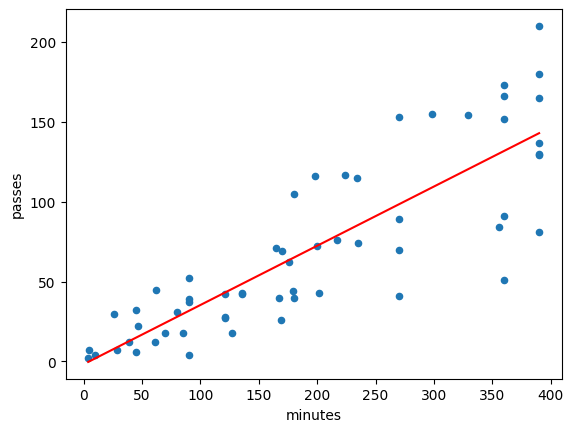

In [27]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
country_col = None
for cand in ['country', 'Country', 'nationality', 'Nationality', 'team', 'Team']:
    if cand in players.columns:
        country_col = cand
        break
if country_col is None:
    raise KeyError("No country/nationality column found in players dataframe")

train = players[players[country_col].isin(['Greece', 'USA', 'Portugal'])]
m, c = np.polyfit(train.minutes, train.passes, 1)
print('Training data:')
train.plot.scatter('minutes', 'passes')
x1, x2 = train.minutes.min(), train.minutes.max()
plt.plot([x1, x2], [m * x1 + c, m * x2 + c], color='red')
plt.xlabel('minutes')
plt.ylabel('passes')
plt.show()

In [28]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
while True:
    name = input('Enter player surname (or "quit" to quit): ')
    if name == 'quit':
        break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Surname not in dataset')
    elif len(player) > 1:
        print('Multiple players with that surname; please specify further')
    else:
        predicted = m * float(player.minutes) + c
        print('Predicted passes:', predicted)
        print('Actual passes:', float(player.passes))

Enter player surname (or "quit" to quit): Halliche


/tmp/ipython-input-1295053444.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predicted = m * float(player.minutes) + c
/tmp/ipython-input-1295053444.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual passes:', float(player.passes))


Predicted passes: 98.37920386964325
Actual passes: 94.0
Enter player surname (or "quit" to quit): quit


In [29]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
coefs = {}
for pos, subset in players.groupby('position'):
    if len(subset) < 2:
        continue
    a, b = np.polyfit(subset.minutes, subset.passes, 1)
    coefs[pos.lower()] = (a, b)

while True:
    name = input('Enter player surname (or "quit" to quit): ')
    if name == 'quit':
        break
    player = players[players.surname == name]
    if len(player) == 0:
        print('Surname not in dataset')
        continue
    if len(player) > 1:
        print('Multiple players with that surname; please specify further')
        continue
    pos = str(player.iloc[0].position).lower()
    if pos not in coefs:
        print(f'No model for position {pos}')
        continue
    a, b = coefs[pos]
    predicted = a * float(player.minutes) + b
    print(f'Position: {player.iloc[0].position}')
    print('Predicted passes:', predicted)
    print('Actual passes:', float(player.passes))

Enter player surname (or "quit" to quit): Djebbour


/tmp/ipython-input-752701705.py:31: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predicted = a * float(player.minutes) + b
/tmp/ipython-input-752701705.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Actual passes:', float(player.passes))


Position: forward
Predicted passes: 35.80558179855076
Actual passes: 19.0
Enter player surname (or "quit" to quit): Belhadj
Position: defender
Predicted passes: 116.4798439130315
Actual passes: 146.0
Enter player surname (or "quit" to quit): Kadir
Position: midfielder
Predicted passes: 132.54672314483247
Actual passes: 104.0
Enter player surname (or "quit" to quit): Abdoun
Position: midfielder
Predicted passes: 2.3681049787452464
Actual passes: 6.0
Enter player surname (or "quit" to quit): quit
